# Ovo je nasa prva jupyter notebook 

### Analiziracemo jedan semi-empirijski model atmosfere

### Taj model su u stvari nizovi vrednosti koji opisuju kako fizicki parametri zavise od visine (odnosno optičke dubine)

### Uskoro ćemo videti šta ovaj naš model sadrži ali u principu najvažnija dva parametra su Temperatura i pritisak gasa. 


#### Koristimo model atmosfere u fajlu falc_71.dat

#### Potrebne su nam prve cetiri kolone. To su:
#### 0 - logaritam opticke dubine
#### 1 - visina u cm 
#### 2 - temperatura u K
#### 3 - pritisak gasa u dyn / cm^2

In [37]:
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
atmos = np.loadtxt("falc_71.dat", unpack=True, skiprows=1)

In [3]:
atmos.shape

(12, 71)

In [5]:
logtau = np.copy(atmos[0]) # bezdimenziono
h = np.copy(atmos[1]) / 1E5 # u km
T = np.copy(atmos[2]) # u K 
pg = np.copy(atmos[3]) # u dyn / cm^2

Text(0.5, 1.0, 'Temperatura u FALC modelu atmosfere')

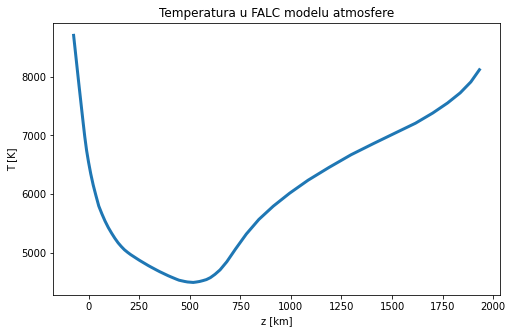

In [12]:
plt.figure(figsize=[8,5])
plt.plot(h,T, linewidth=3)
plt.xlabel("z [km]")
plt.ylabel("T [K]")
plt.title("Temperatura u FALC modelu atmosfere")

Text(0.5, 1.0, 'Temperatura u FALC modelu atmosfere')

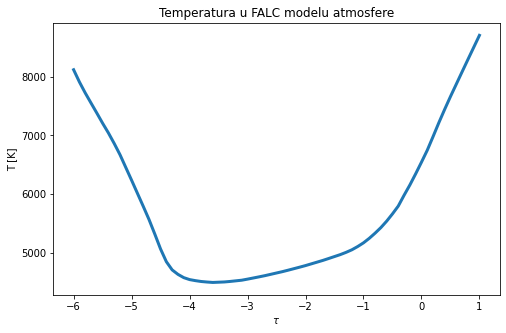

In [13]:
plt.figure(figsize=[8,5])
plt.plot(logtau,T, linewidth=3)
plt.xlabel("$\\tau$")
plt.ylabel("T [K]")
plt.title("Temperatura u FALC modelu atmosfere")

Text(0.5, 1.0, 'Temperatura u FALC modelu atmosfere')

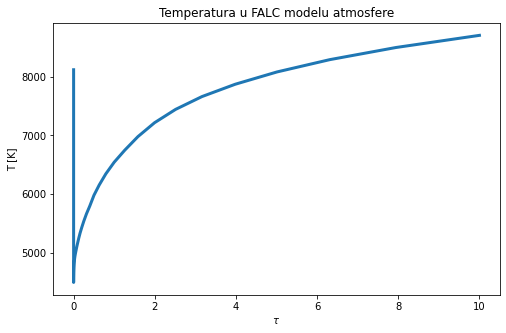

In [14]:
plt.figure(figsize=[8,5])
plt.plot(10**logtau,T, linewidth=3)
plt.xlabel("$\\tau$")
plt.ylabel("T [K]")
plt.title("Temperatura u FALC modelu atmosfere")

### Izgleda da plotovati stvari na skali opticke dubine umesto na skali logaritma opticke dubine nije bas najiluminativnije

### Hajde da isplotujemo log tau (h)

Text(0.5, 1.0, 'Pritisak u zavisnosti od h')

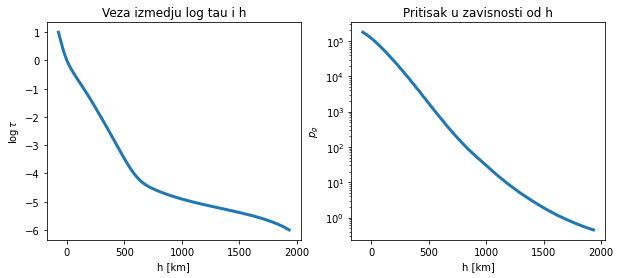

In [19]:
plt.figure(figsize=[10,4])

plt.subplot(121)
plt.plot(h,logtau, linewidth=3)
plt.ylabel("$\\log\\tau$")
plt.xlabel("h [km]")
plt.title("Veza izmedju log tau i h")

plt.subplot(122)
plt.semilogy(h,pg, linewidth=3)
plt.ylabel("$p_g$")
plt.xlabel("h [km]")
plt.title("Pritisak u zavisnosti od h")

### Pod pretpostavkom da je gas sacinjen samo od vodonika, dakle imamo H, H+ i e, nacicemo stepen jonizacije u zavisnosti od visine u ovom modelu atmosfere Sunca

In [34]:
# Da bismo to uradili, treba nam funkcija koja nam za dati
# pritisak i temperaturu vraca potrebne koncentracije 

def resi_jnu_stanja(T, p):
    
    me = 9.1E-28 # u g
    k = 1.38E-16 # erg / K zar ne?
    h = 6.626E-27 # erg * s
    
    g_i = 2.0
    g_ip = 1.0
    
    E_j = 13.6 * 1.6E-12
    
    # koeficijent a je odredjen desnom stranom sahine jednacine
    
    a = (2.0*np.pi*me*k*T/h/h)**1.5 * 2.0 * g_ip / g_i \
    * np.exp(-E_j/k/T)
    
    n = p/k/T
    
    n_e = - a + np.sqrt(a**2.0 + a * n)
    n_p = n_e
    n_H = n - 2*n_e
    
    return n_H, n_p, n_e

In [49]:
n_H, n_p, n_e = resi_jnu_stanja(8500, 2E1)

print ("Stepen jonizacije gasa je : ", n_p / (n_H+n_p))

Stepen jonizacije gasa je :  0.702129884424604
